In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("netflix.csv")

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### 1 ¿Qué tipo de show es el más frecuente?

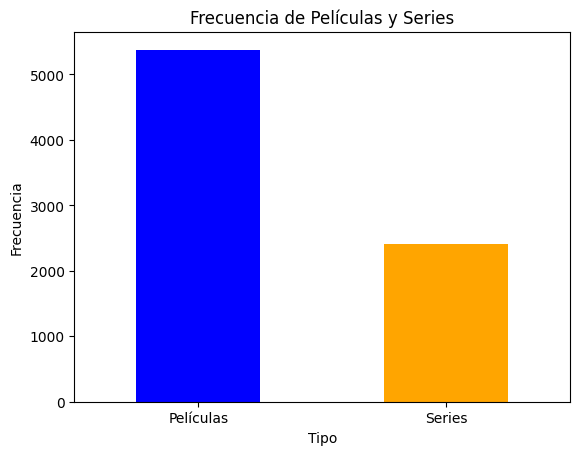

In [5]:
frecuencia_tipos = df['type'].value_counts()

# Crea la figura y los ejes
fig, ax = plt.subplots()

# Grafica el gráfico de barras de frecuencia de tipos
frecuencia_tipos.plot(kind='bar', ax=ax, color=['blue', 'orange'])

# Configura el título y las etiquetas de los ejes
ax.set_title('Frecuencia de Películas y Series')
ax.set_xlabel('Tipo')
ax.set_ylabel('Frecuencia')
ax.set_xticklabels(['Películas', 'Series'], rotation=0)

# Muestra la gráfica
plt.show()

### 2 ¿En qué año se produjeron más películas y series?

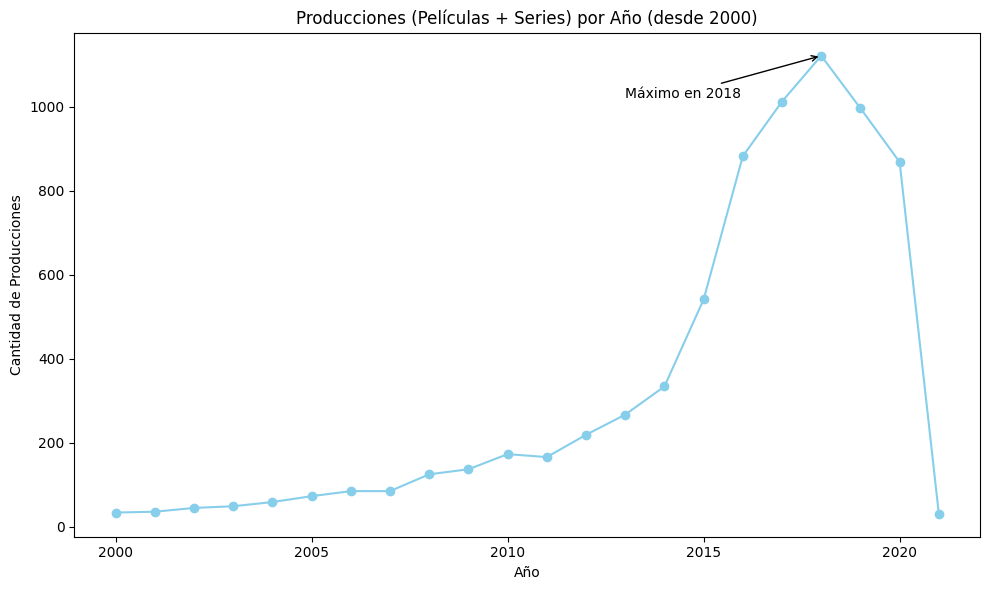

In [6]:
# Filtra el DataFrame para incluir solo los datos a partir del año 2000
df_desde_2000 = df[df['release_year'] >= 2000]

# Agrupa el DataFrame filtrado por año de lanzamiento y cuenta la cantidad de películas y series en cada año
producciones_por_año = df_desde_2000.groupby('release_year')['type'].value_counts().unstack().fillna(0)

# Calcula el total de producciones (películas + series) por año
producciones_por_año['Total'] = producciones_por_año.sum(axis=1)

# Encuentra el año con el mayor número total de producciones
año_max_producciones = producciones_por_año['Total'].idxmax()

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Grafica la cantidad total de producciones por año como un gráfico de líneas
producciones_por_año['Total'].plot(kind='line', ax=ax, color='skyblue', marker='o')

# Destaca el año con el mayor número de producciones
ax.annotate(f'Máximo en {año_max_producciones}', xy=(año_max_producciones, producciones_por_año['Total'].max()),
            xytext=(año_max_producciones - 5, producciones_por_año['Total'].max() - 100),
            arrowprops=dict(facecolor='black', arrowstyle='->'))

# Configura el título y las etiquetas de los ejes
ax.set_title('Producciones (Películas + Series) por Año (desde 2000)')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de Producciones')

# Muestra la gráfica
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

### 3. ¿Qué países aportan más películas y series de TV?

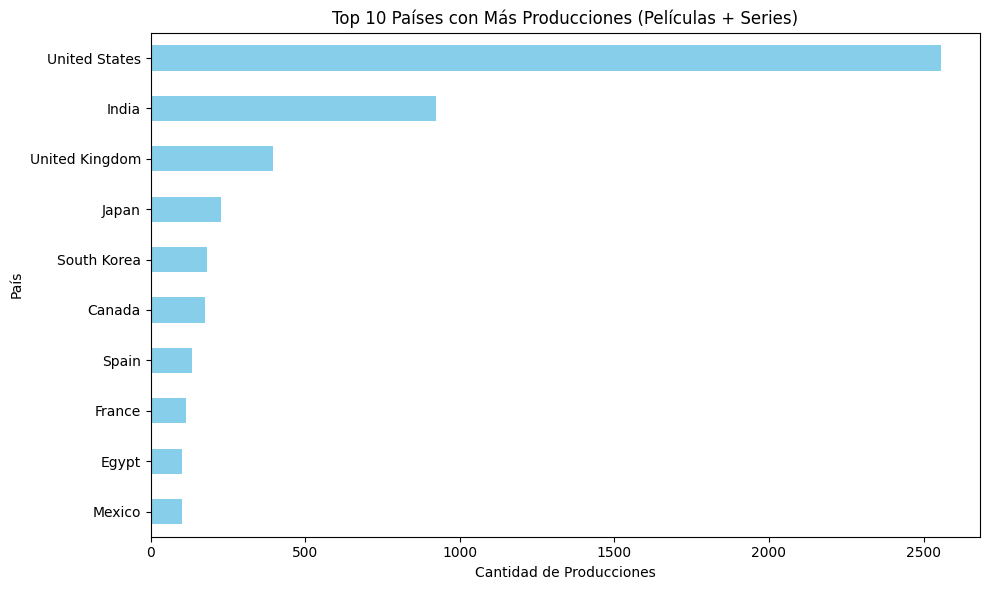

In [7]:

# Agrupa el DataFrame por país y cuenta la cantidad de películas y series en cada país
producciones_por_pais = df.groupby('country')['type'].value_counts().unstack().fillna(0)

# Calcula el total de producciones (películas + series) por país
producciones_por_pais['Total'] = producciones_por_pais.sum(axis=1)

# Ordena los países por la cantidad total de producciones
producciones_por_pais = producciones_por_pais.sort_values(by='Total', ascending=True)

# Filtra los 10 países con la mayor cantidad total de producciones
top_10_paises = producciones_por_pais.tail(10)

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Grafica la cantidad total de producciones por país como un gráfico de barras horizontales
top_10_paises['Total'].plot(kind='barh', ax=ax, color='skyblue')

# Configura el título y las etiquetas de los ejes
ax.set_title('Top 10 Países con Más Producciones (Películas + Series)')
ax.set_xlabel('Cantidad de Producciones')
ax.set_ylabel('País')

# Muestra la gráfica
plt.tight_layout()
plt.show()

### 4

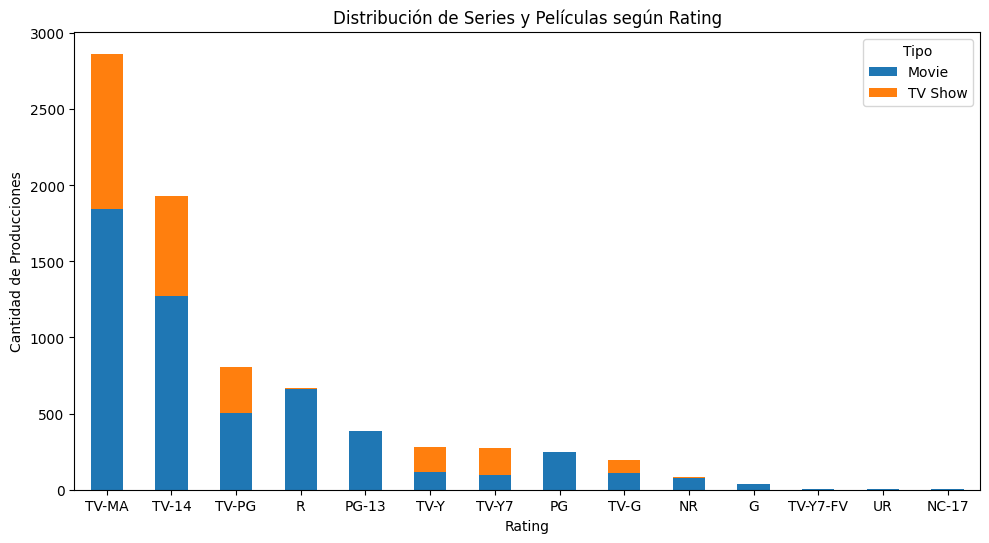

In [8]:

# Suponiendo que 'df' es tu DataFrame con la información de películas y series
# Reemplaza 'df' con el nombre real de tu DataFrame

# Agrupa el DataFrame por rating y tipo (serie o película) y cuenta la cantidad de producciones en cada categoría
distribucion_por_rating = df.groupby(['rating', 'type']).size().unstack(fill_value=0)

# Reordena las columnas del DataFrame para que las categorías de rating estén ordenadas de menor a mayor
ratings_ordenados = sorted(distribucion_por_rating.index)

# Crea el nuevo DataFrame con las columnas ordenadas
distribucion_por_rating_ordenado = distribucion_por_rating.reindex(ratings_ordenados)

# Calcula el total de cada categoría de rating y ordénalos de mayor a menor
total_por_rating = distribucion_por_rating_ordenado.sum(axis=1)
total_por_rating_ordenado = total_por_rating.sort_values(ascending=False)

# Reordena las columnas del DataFrame según el orden de los totales
distribucion_por_rating_ordenado = distribucion_por_rating_ordenado.loc[total_por_rating_ordenado.index]

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Grafica la distribución de la cantidad de series y películas según rating como un gráfico de barras apiladas
distribucion_por_rating_ordenado.plot(kind='bar', stacked=True, ax=ax)

# Configura el título y las etiquetas de los ejes
ax.set_title('Distribución de Series y Películas según Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Cantidad de Producciones')

# Muestra la gráfica
plt.tight_layout()
plt.xticks(rotation=360)
plt.legend(title='Tipo')
plt.show()


### 5 ¿Cómo se distribuye la audiencia objetivo (usar rating para esto) según el origen de los shows?

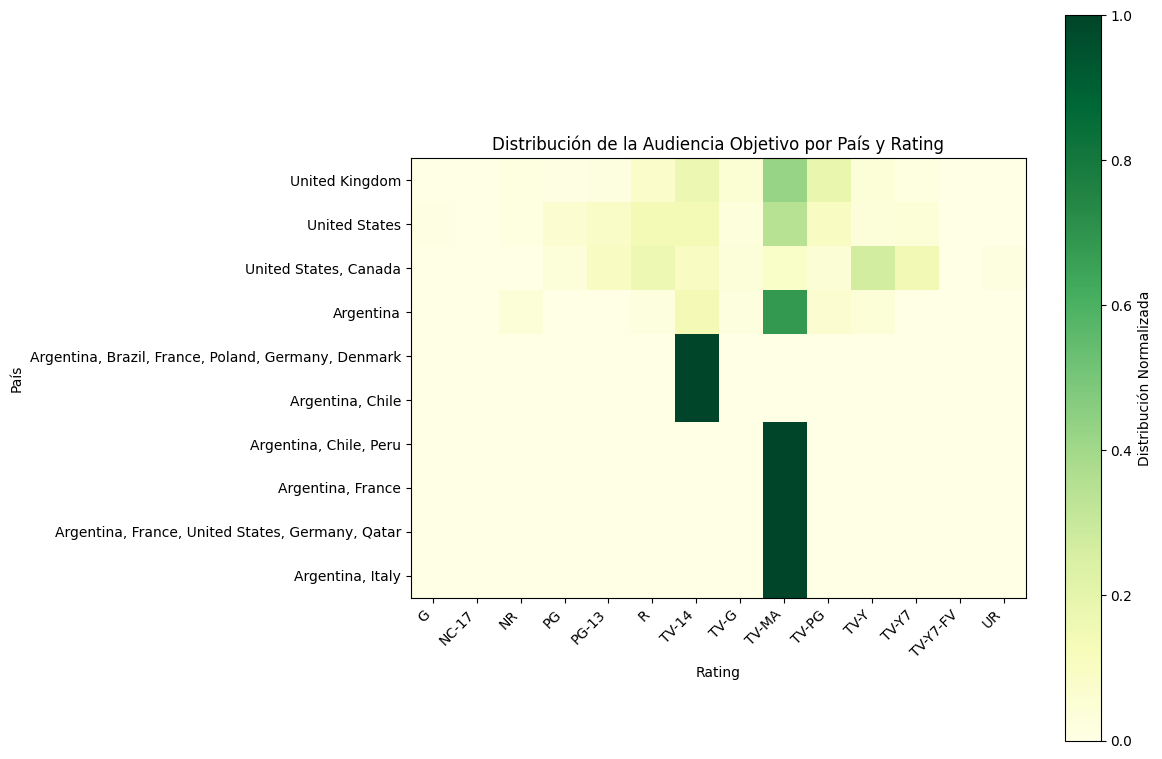

In [9]:

# Suponiendo que 'df' es tu DataFrame con la información de películas y series
# Reemplaza 'df' con el nombre real de tu DataFrame

# Agrupa los datos por país y rating, cuenta la cantidad de shows y normaliza
audiencia_por_pais_y_rating = df.groupby(['country', 'rating']).size().unstack(fill_value=0)
audiencia_por_pais_y_rating_norm = audiencia_por_pais_y_rating.div(audiencia_por_pais_y_rating.sum(axis=1), axis=0)

# Filtra los países con mayor cantidad de shows para una mejor visualización
top_paises = audiencia_por_pais_y_rating_norm.sum(axis=1).nlargest(10).index
audiencia_por_pais_y_rating_norm_top = audiencia_por_pais_y_rating_norm.loc[top_paises]

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Grafica la distribución de la audiencia objetivo según el origen de los shows como un heatmap
heatmap = ax.imshow(audiencia_por_pais_y_rating_norm_top, cmap='YlGn')

# Configura el título y las etiquetas de los ejes
ax.set_title('Distribución de la Audiencia Objetivo por País y Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('País')

# Muestra la barra de color
cbar = plt.colorbar(heatmap)
cbar.set_label('Distribución Normalizada')

# Muestra los ticks y las etiquetas
ax.set_xticks(range(len(audiencia_por_pais_y_rating_norm_top.columns)))
ax.set_xticklabels(audiencia_por_pais_y_rating_norm_top.columns)
ax.set_yticks(range(len(audiencia_por_pais_y_rating_norm_top.index)))
ax.set_yticklabels(audiencia_por_pais_y_rating_norm_top.index)

# Rota las etiquetas del eje y para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Ajusta el diseño y muestra la gráfica
plt.tight_layout()
plt.show()


### 6  ¿Cómo se distribuye la cantidad de series y películas según cada mes? Varía la categoría (listed in) según el mes del año?

In [29]:

# Suponiendo que 'df' es tu DataFrame con la información de películas y series
# Reemplaza 'df' con el nombre real de tu DataFrame

try:
    df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y')
except ValueError as e:
    print(f"Error al convertir la columna 'date_added' a tipo datetime: {e}")

# Si hay valores no válidos, identifícalos y corrígelos
invalid_dates = df.loc[df['date_added'].isnull(), 'date_added']
if not invalid_dates.empty:
    print("Valores no válidos en la columna 'date_added':")
    print(invalid_dates)


# Convertir la columna 'date_added' a tipo datetime si aún no lo está
df['date_added'] = pd.to_datetime(df['date_added'])

# Extraer el mes de la columna 'date_added' y crear una nueva columna 'month_added'
df['month_added'] = df['date_added'].dt.month

# Agrupar los datos por el mes de 'date_added' y la categoría 'listed_in', contando la cantidad de series y películas en cada combinación
distribucion_por_mes_y_categoria = df.groupby(['month_added', 'listed_in', 'type']).size().unstack(fill_value=0)

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Grafica la distribución de la cantidad de series y películas según cada mes y categoría
distribucion_por_mes_y_categoria.plot(kind='bar', stacked=True, ax=ax)

# Configura el título y las etiquetas de los ejes
ax.set_title('Distribución de Series y Películas según Mes y Categoría')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de Producciones')

# Muestra la gráfica
plt.tight_layout()
plt.legend(title='Tipo')
plt.show()


Error al convertir la columna 'date_added' a tipo datetime: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 218. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
Valores no válidos en la columna 'date_added':
258     NaN
549     NaN
2263    NaN
2288    NaN
2555    NaN
3374    NaN
3492    NaN
3946    NaN
5137    NaN
6065    NaN
Name: date_added, dtype: object


ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 218. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

### 7 ¿Cuáles son los directores más populares?

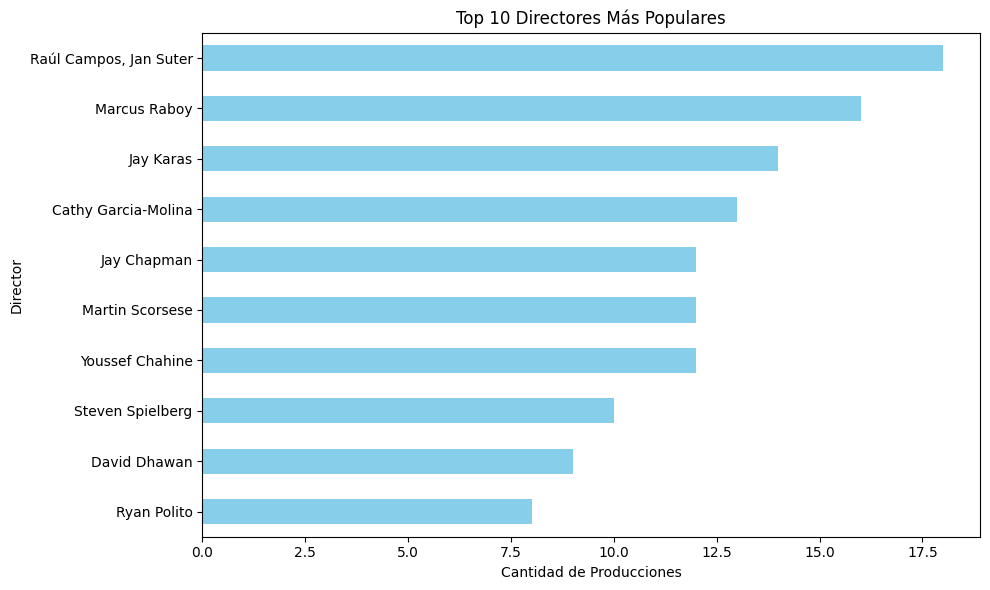

In [11]:
# Suponiendo que 'df' es tu DataFrame con la información de películas y series
# Reemplaza 'df' con el nombre real de tu DataFrame

# Cuenta la cantidad de producciones para cada director
directores_populares = df['director'].value_counts().head(10)

# Reordena los directores de mayor a menor
directores_populares = directores_populares.sort_values(ascending=True)

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Grafica los 10 directores más populares como un gráfico de barras horizontales
directores_populares.plot(kind='barh', ax=ax, color='skyblue')

# Configura el título y las etiquetas de los ejes
ax.set_title('Top 10 Directores Más Populares')
ax.set_xlabel('Cantidad de Producciones')
ax.set_ylabel('Director')

# Muestra la gráfica
plt.tight_layout()
plt.show()


### 8 ¿Cuáles son los actores más populares?

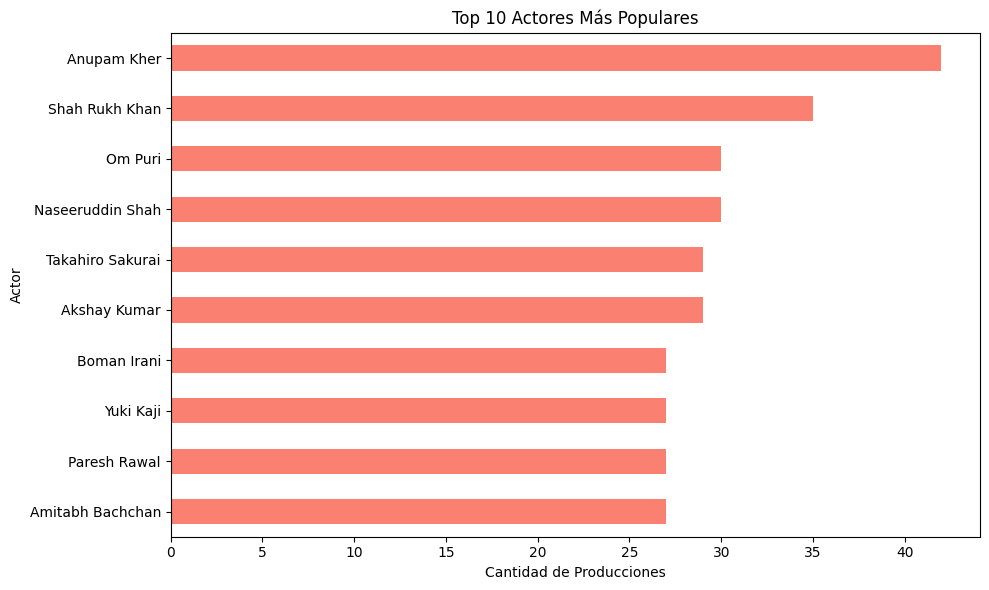

In [13]:

# Suponiendo que 'df' es tu DataFrame con la información de películas y series
# Reemplaza 'df' con el nombre real de tu DataFrame

# Eliminar las comillas de la columna 'cast' y dividir los nombres de los actores
actores = df['cast'].str.replace('"', '').str.split(', ')

# Concatenar todas las listas de actores en una sola serie
actores_concatenados = pd.Series([actor for sublist in actores.dropna() for actor in sublist])

# Cuenta la cantidad de producciones para cada actor
actores_populares = actores_concatenados.value_counts().head(10)

# Reordena los actores de mayor a menor
actores_populares = actores_populares.sort_values(ascending=True)

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Grafica los 10 actores más populares como un gráfico de barras horizontales
actores_populares.plot(kind='barh', ax=ax, color='salmon')

# Configura el título y las etiquetas de los ejes
ax.set_title('Top 10 Actores Más Populares')
ax.set_xlabel('Cantidad de Producciones')
ax.set_ylabel('Actor')

# Muestra la gráfica
plt.tight_layout()
plt.show()


### 9 ¿Cómo se distribuye la duración en series y películas?

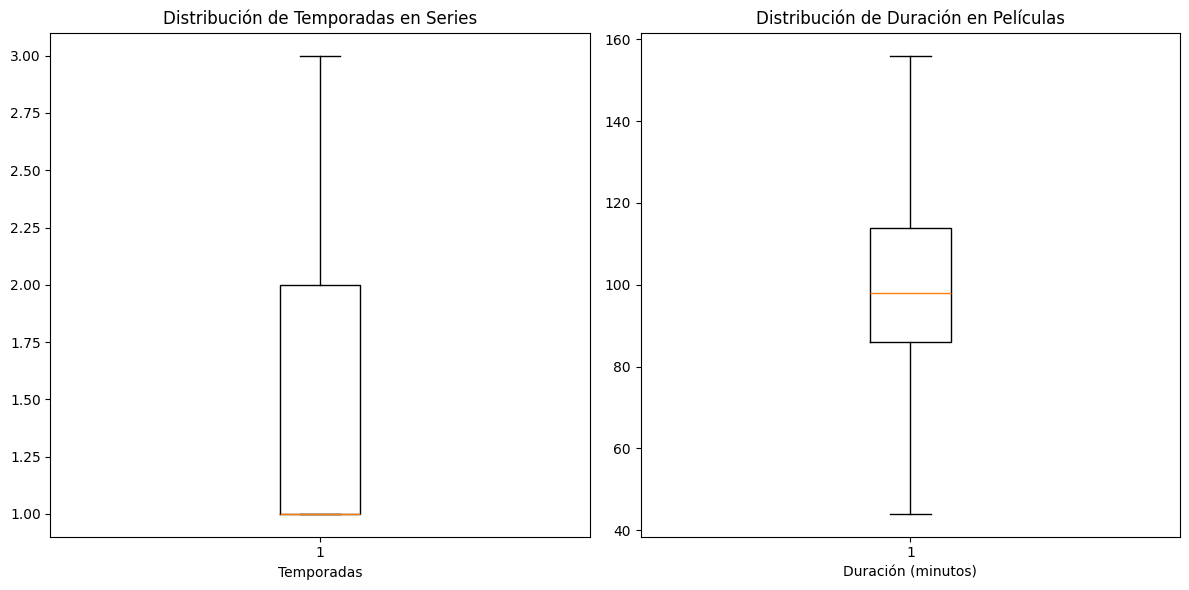

In [31]:
def extract_duration(duration_str):
    if 'Season' in duration_str:
        return int(duration_str.split()[0])
    return 0

def extract_seasons(duration_str:str):
    duration_str.lower
    return int(duration_str.split()[0])
    if 'Season' or 'Seasons' in duration_str:
        return int(duration_str.split()[0])
    return None

df['duration_min'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'Season' not in x else None)
df['seasons'] = df['duration'].apply(extract_seasons)

# Dividir el DataFrame en dos según el tipo (TV Show o Movie)
tv_shows = df[df['type'] == 'TV Show']
movies = df[df['type'] == 'Movie']

# Generar boxplots
plt.figure(figsize=(12, 6))

# Boxplot para la distribución de temporadas en series
plt.subplot(1, 2, 1)
plt.boxplot(tv_shows['seasons'].dropna(), vert=True, showfliers=False)
plt.title('Distribución de Temporadas en Series')
plt.xlabel('Temporadas')

# Boxplot para la distribución de duración en películas
plt.subplot(1, 2, 2)
plt.boxplot(movies['duration_min'].dropna(), vert=True, showfliers=False)
plt.title('Distribución de Duración en Películas')
plt.xlabel('Duración (minutos)')

plt.tight_layout()
plt.show()

### 10 ¿Hay palabras que se utilicen más que otras en titulos y descripciones?

In [49]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from collections import Counter
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/coru/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

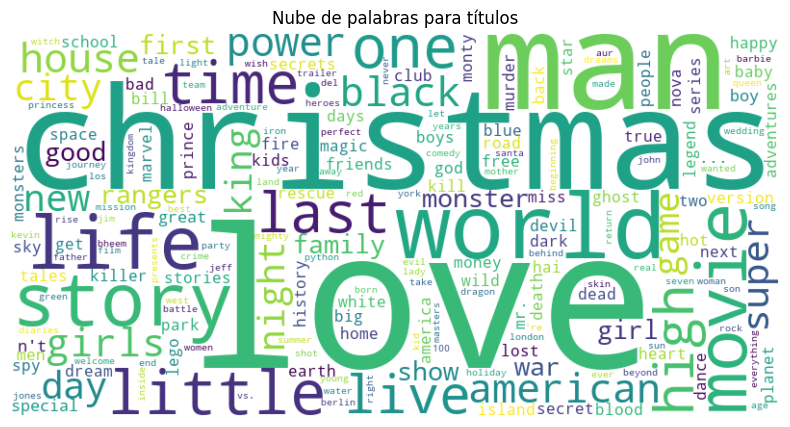

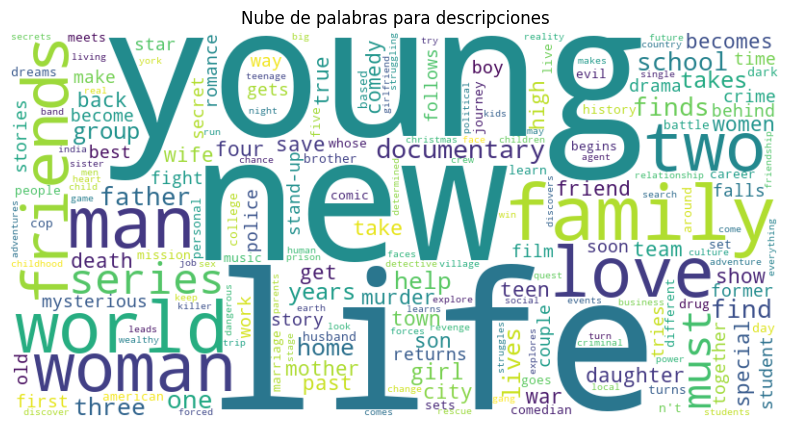

In [50]:
def tokenize_and_clean(text):
    tokens = word_tokenize(text.lower())  # Tokenizar y convertir a minúsculas
    # Eliminar stopwords y palabras con menos de 3 caracteres
    cleaned_tokens = [token for token in tokens if token not in stopwords.words('english') and len(token) > 2]
    return cleaned_tokens

# Concatenar todos los títulos y descripciones en una sola cadena
all_titles = ' '.join(df['title'])
all_descriptions = ' '.join(df['description'])

# Tokenizar y limpiar los textos
cleaned_titles = tokenize_and_clean(all_titles)
cleaned_descriptions = tokenize_and_clean(all_descriptions)

# Contar la frecuencia de las palabras en los títulos y descripciones
title_word_freq = Counter(cleaned_titles)
description_word_freq = Counter(cleaned_descriptions)

# Nube de palabras para los títulos
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(title_word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras para títulos')
plt.show()

# Nube de palabras para las descripciones
description_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(description_word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(description_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras para descripciones')
plt.show()